In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

coffee = pd.read_csv('synthetic_coffee_health.csv')

coffee

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9997,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9998,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9999,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


In [ ]:
coffee.shape

(10001, 16)

In [ ]:
coffee.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
coffee.sample(6)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
9333,9333,28,Female,Germany,5.2,491.9,3.0,Poor,24.8,72,High,4.9,Mild,Service,1,1
3878,3878,37,Female,South Korea,2.6,246.6,8.0,Excellent,27.4,68,Low,4.5,NaN,Office,0,1
1908,1908,21,Male,Japan,3.1,290.7,5.3,Fair,20.2,64,Medium,9.1,Mild,Healthcare,0,0
3110,3110,18,Female,Norway,2.2,208.0,6.0,Fair,21.7,56,Medium,2.9,Mild,Healthcare,0,0
7923,7923,19,Female,China,3.1,290.5,5.2,Fair,24.9,72,Medium,4.4,Mild,Office,1,1
8076,8076,36,Female,Norway,2.0,188.1,4.3,Poor,22.4,58,High,1.5,Mild,Healthcare,0,0


In [ ]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10001 non-null  int64  
 1   Age                      10001 non-null  int64  
 2   Gender                   10001 non-null  object 
 3   Country                  10001 non-null  object 
 4   Coffee_Intake            10001 non-null  float64
 5   Caffeine_mg              10001 non-null  float64
 6   Sleep_Hours              10001 non-null  float64
 7   Sleep_Quality            10001 non-null  object 
 8   BMI                      9997 non-null   float64
 9   Heart_Rate               10001 non-null  int64  
 10  Stress_Level             10001 non-null  object 
 11  Physical_Activity_Hours  10001 non-null  float64
 12  Health_Issues            4061 non-null   object 
 13  Occupation               10001 non-null  object 
 14  Smoking               

In [ ]:
coffee.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,9997.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.014199,34.943906,2.508529,238.345415,6.635686,23.988767,70.613739,7.490181,0.200580,0.300570
std,2887.160084,11.162077,1.450502,137.772561,1.221785,3.912667,9.821573,4.314314,0.400454,0.458529
min,1.000000,18.000000,0.000000,0.000000,3.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2500.000000,26.000000,1.500000,138.600000,5.800000,21.300000,64.000000,3.800000,0.000000,0.000000
50%,5000.000000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.500000,0.000000,0.000000
75%,7500.000000,43.000000,3.500000,331.900000,7.500000,26.600000,77.000000,11.200000,0.000000,1.000000
max,10000.000000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.000000,1.000000,1.000000


In [ ]:
coffee.isnull().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           4
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5940
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [ ]:
coffee.dropna(inplace=True)

In [ ]:
coffee["BMI"] = coffee["BMI"].fillna(coffee["BMI"].median())

coffee["BMI"]

2       22.7
3       24.7
4       24.1
6       24.3
7       15.8
        ... 
9991    25.6
9992    24.2
9995    25.5
9996    30.5
9997    19.1
Name: BMI, Length: 4060, dtype: float64

In [ ]:
coffee["Smoking"]

2       0
3       0
4       0
6       1
7       1
       ..
9991    0
9992    0
9995    0
9996    0
9997    0
Name: Smoking, Length: 4060, dtype: int64

In [ ]:
coffee_raw = coffee.copy()

In [ ]:
coffee_cleaned = coffee.drop_duplicates(keep='first')

coffee_cleaned

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
6,7,53,Male,France,2.7,252.1,7.8,Good,24.3,58,Low,1.0,Mild,Student,1,0
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9991,52,Male,Japan,0.3,29.7,5.2,Fair,25.6,67,Medium,3.3,Moderate,Office,0,0
9992,9992,37,Male,UK,2.4,225.6,4.3,Poor,24.2,56,High,1.3,Mild,Healthcare,0,1
9995,9995,49,Female,Germany,1.6,150.1,5.7,Fair,25.5,81,Medium,12.9,Mild,Student,0,1
9996,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1


In [ ]:
coffee_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4057 entries, 2 to 9997
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4057 non-null   int64  
 1   Age                      4057 non-null   int64  
 2   Gender                   4057 non-null   object 
 3   Country                  4057 non-null   object 
 4   Coffee_Intake            4057 non-null   float64
 5   Caffeine_mg              4057 non-null   float64
 6   Sleep_Hours              4057 non-null   float64
 7   Sleep_Quality            4057 non-null   object 
 8   BMI                      4057 non-null   float64
 9   Heart_Rate               4057 non-null   int64  
 10  Stress_Level             4057 non-null   object 
 11  Physical_Activity_Hours  4057 non-null   float64
 12  Health_Issues            4057 non-null   object 
 13  Occupation               4057 non-null   object 
 14  Smoking                  4057

In [ ]:
coffee_cleaned.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000,4057.000000
mean,5011.101553,38.006655,2.702070,256.776633,5.749248,24.723170,70.875770,7.446734,0.196697,0.294799
std,2871.635186,12.916310,1.470826,139.686475,1.134670,4.364626,9.782942,4.324660,0.397550,0.456009
min,3.000000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.000000,0.000000,0.000000
25%,2514.000000,28.000000,1.600000,155.100000,5.000000,21.700000,64.000000,3.700000,0.000000,0.000000
50%,5033.000000,37.000000,2.700000,255.000000,5.600000,24.500000,71.000000,7.400000,0.000000,0.000000
75%,7498.000000,49.000000,3.700000,351.300000,6.100000,27.700000,78.000000,11.200000,0.000000,1.000000
max,9997.000000,80.000000,7.800000,742.200000,10.000000,38.200000,103.000000,15.000000,1.000000,1.000000


In [ ]:
coffee_cleaned.sample(7)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
1294,1294,45,Female,Italy,3.8,363.3,4.7,Poor,24.9,71,High,1.0,Mild,Office,1,0
2893,2893,44,Female,Belgium,0.0,0.0,5.0,Poor,27.1,75,High,2.8,Mild,Office,0,0
235,235,60,Male,UK,3.7,352.1,5.8,Fair,24.2,56,Medium,10.5,Moderate,Service,1,0
4777,4777,34,Male,Italy,1.7,165.5,5.2,Fair,25.3,74,Medium,11.7,Mild,Office,0,1
9435,9435,53,Male,Netherlands,0.7,65.2,6.3,Good,18.1,62,Low,14.6,Mild,Office,0,0
1280,1280,31,Male,Netherlands,2.8,267.6,5.6,Fair,27.9,78,Medium,13.6,Mild,Office,0,0
1378,1378,47,Male,Netherlands,3.5,336.9,5.5,Fair,20.2,68,Medium,8.4,Mild,Office,0,0


In [ ]:
coffee_cleaned.isnull().sum()

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

In [ ]:
coffee_cleaned = coffee_cleaned[coffee_cleaned['Age'].between(10,100)]
coffee_cleaned = coffee_cleaned[coffee_cleaned['Sleep_Hours'].between(0,24)]
coffee_cleaned = coffee_cleaned[coffee_cleaned['BMI'].between(0, 40)]
coffee_cleaned = coffee_cleaned[coffee_cleaned['Heart_Rate'].between(0, 120)]

coffee_cleaned

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
6,7,53,Male,France,2.7,252.1,7.8,Good,24.3,58,Low,1.0,Mild,Student,1,0
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9991,52,Male,Japan,0.3,29.7,5.2,Fair,25.6,67,Medium,3.3,Moderate,Office,0,0
9992,9992,37,Male,UK,2.4,225.6,4.3,Poor,24.2,56,High,1.3,Mild,Healthcare,0,1
9995,9995,49,Female,Germany,1.6,150.1,5.7,Fair,25.5,81,Medium,12.9,Mild,Student,0,1
9996,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1


In [ ]:
print(coffee_cleaned[~coffee_cleaned['BMI'].between(0, 40)])
print(coffee_cleaned[~coffee_cleaned['Heart_Rate'].between(0, 120)])

Empty DataFrame
Columns: [ID, Age, Gender, Country, Coffee_Intake, Caffeine_mg, Sleep_Hours, Sleep_Quality, BMI, Heart_Rate, Stress_Level, Physical_Activity_Hours, Health_Issues, Occupation, Smoking, Alcohol_Consumption]
Index: []
Empty DataFrame
Columns: [ID, Age, Gender, Country, Coffee_Intake, Caffeine_mg, Sleep_Hours, Sleep_Quality, BMI, Heart_Rate, Stress_Level, Physical_Activity_Hours, Health_Issues, Occupation, Smoking, Alcohol_Consumption]
Index: []


In [ ]:
coffee_cleaned['Country'].unique()

coffee_cleaned[coffee_cleaned['Age'] > 30]

coffee_cleaned[coffee_cleaned['Sleep_Hours'] < 6]

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
14,15,18,Male,Mexico,3.2,308.3,5.9,Fair,21.1,83,Medium,14.5,Mild,Service,1,0
16,17,22,Female,China,2.6,248.2,5.9,Fair,24.0,70,Medium,4.7,Mild,Service,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9988,18,Male,Norway,3.2,304.9,5.5,Fair,20.1,78,Medium,14.2,Mild,Student,0,1
9991,9991,52,Male,Japan,0.3,29.7,5.2,Fair,25.6,67,Medium,3.3,Moderate,Office,0,0
9992,9992,37,Male,UK,2.4,225.6,4.3,Poor,24.2,56,High,1.3,Mild,Healthcare,0,1
9995,9995,49,Female,Germany,1.6,150.1,5.7,Fair,25.5,81,Medium,12.9,Mild,Student,0,1


In [ ]:
coff_sleep = coffee_cleaned["Sleep_Hours"]
coff_heart = coffee_cleaned["Heart_Rate"]
coff_age = coffee_cleaned["Age"]
coff_BMI = coffee_cleaned["BMI"]
coff_ph = coffee_cleaned["Physical_Activity_Hours"]

In [ ]:
coffee_cleaned[(coff_age > 25) & (coff_sleep < 7)]

coffee_cleaned[(coff_BMI < 70) | (coff_heart > 50)]

coffee_cleaned[(coff_ph > 25) & (coff_sleep < 7)]

coffee_cleaned[(coff_ph > 6)| (coff_sleep < 7)]

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
7,8,44,Female,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
9,10,41,Female,Switzerland,4.0,383.2,6.4,Good,30.4,69,Low,11.9,Mild,Office,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9991,52,Male,Japan,0.3,29.7,5.2,Fair,25.6,67,Medium,3.3,Moderate,Office,0,0
9992,9992,37,Male,UK,2.4,225.6,4.3,Poor,24.2,56,High,1.3,Mild,Healthcare,0,1
9995,9995,49,Female,Germany,1.6,150.1,5.7,Fair,25.5,81,Medium,12.9,Mild,Student,0,1
9996,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1


In [ ]:
coffee_cleaned.groupby('Country')['Smoking'].mean()

coffee_cleaned.groupby('Country')['Smoking'].std()

coffee_cleaned['Country'].value_counts()

Country
China          233
India          232
Spain          227
Sweden         227
Switzerland    214
South Korea    213
Belgium        212
Canada         211
Germany        204
Australia      204
Norway         203
Netherlands    201
UK             198
Finland        196
Brazil         191
Italy          185
Japan          180
France         179
Mexico         177
USA            170
Name: count, dtype: int64

In [ ]:
coffee_cleaned.groupby('Country')['Alcohol_Consumption'].mean()

coffee_cleaned.groupby('Country')['Alcohol_Consumption'].std()

coffee_cleaned.groupby('Gender')['BMI'].mean()

coffee_cleaned.groupby('Gender')['BMI'].std()

Gender
Female    4.391545
Male      4.351690
Other     4.060491
Name: BMI, dtype: float64

In [ ]:
coffee_cleaned['Gender'].value_counts()

Gender
Female    2047
Male      1917
Other       93
Name: count, dtype: int64

In [ ]:
coffee_cleaned.groupby('Gender')['BMI'].mean()

coffee_cleaned.groupby('Gender')['BMI'].std()

Gender
Female    4.391545
Male      4.351690
Other     4.060491
Name: BMI, dtype: float64

In [ ]:
coffee_cleaned.groupby('Gender')['Caffeine_mg'].mean()

coffee_cleaned.groupby('Stress_Level')['Caffeine_mg'].mean()

Stress_Level
High      283.058125
Low       221.140840
Medium    262.689800
Name: Caffeine_mg, dtype: float64

In [ ]:
X = coffee_cleaned[['Age', 'Caffeine_mg', 'Coffee_Intake', 'BMI', 'Sleep_Hours']]
y = coffee_cleaned[['Heart_Rate']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = model.predict(X_test)

y_pred

array([[70.90078899],
       [69.67720992],
       [70.43556466],
       [71.65337663],
       [71.04053169],
       [71.17193013],
       [70.65430702],
       [71.13150386],
       [70.88679759],
       [69.98989518],
       [70.83415299],
       [70.61106994],
       [69.92299033],
       [71.12803124],
       [70.48634662],
       [70.89525448],
       [71.28522016],
       [71.03393733],
       [71.44456646],
       [72.12857753],
       [71.51012834],
       [70.48494364],
       [69.39781548],
       [71.45790178],
       [70.58838613],
       [70.98646864],
       [70.70136435],
       [70.03696126],
       [70.75440185],
       [70.05387983],
       [70.88879512],
       [70.56014763],
       [71.21844663],
       [69.7792216 ],
       [71.2842258 ],
       [70.31116221],
       [71.09156769],
       [70.04689999],
       [69.49723592],
       [70.70325606],
       [70.99970112],
       [69.85540488],
       [70.80719355],
       [70.25987956],
       [71.26012874],
       [71

In [ ]:
print('Mean_sq_error : ', mean_squared_error(y_test, y_pred))
print('r_sqd : ', r2_score(y_test, y_pred))

Mean_sq_error :  100.22885015538633
r_sqd :  -0.0011810047424583026


In [ ]:
coeff = pd.DataFrame({
    'Feature' : X_train.columns,
    'Coefficient' : model.coef_.flatten()
})

print(coeff)

         Feature  Coefficient
0            Age    -0.003738
1    Caffeine_mg     0.027385
2  Coffee_Intake    -2.343180
3            BMI    -0.048763
4    Sleep_Hours    -0.211402


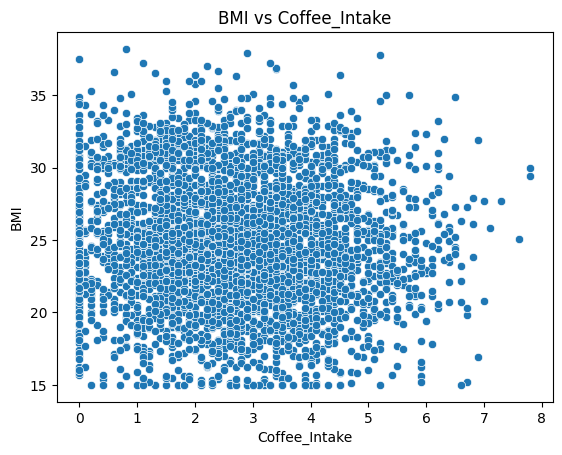

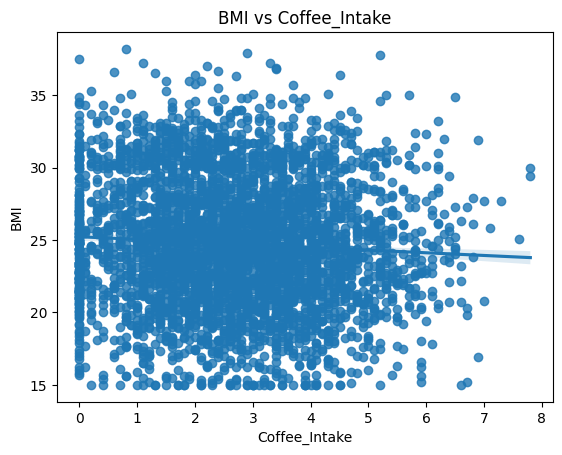

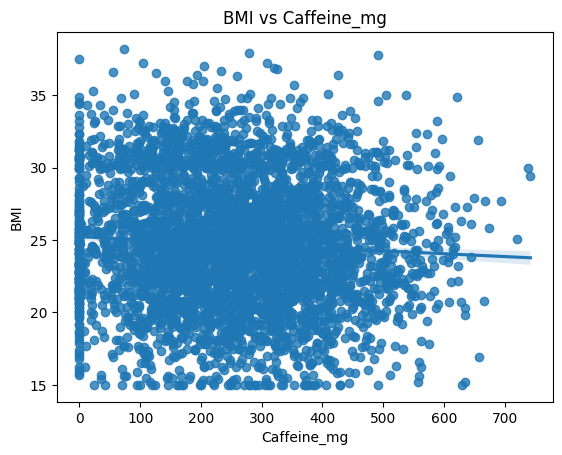

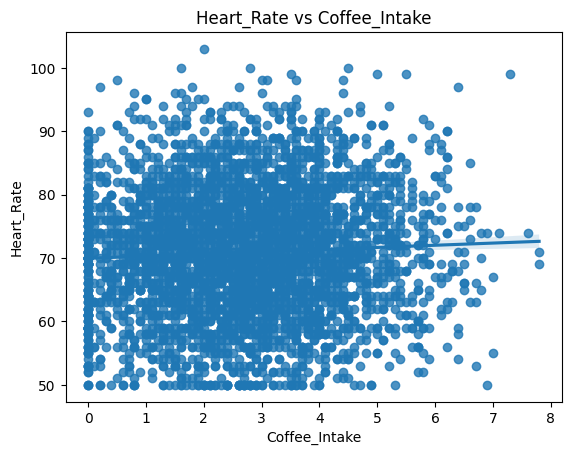

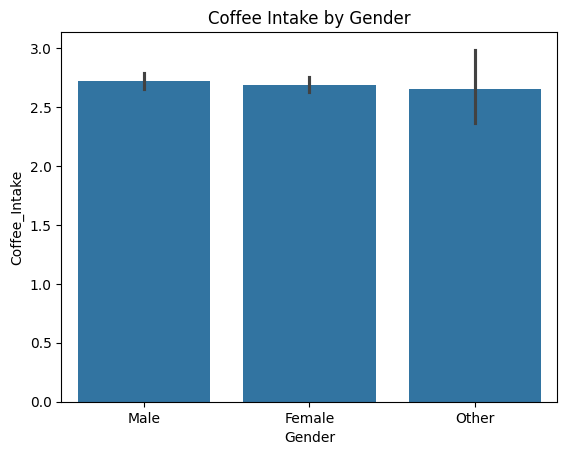

In [ ]:
sns.scatterplot(data=coffee_cleaned, x='Coffee_Intake',y='BMI')
plt.title('BMI vs Coffee_Intake')
plt.show()

sns.regplot(data=coffee_cleaned, x='Coffee_Intake',y='BMI')
plt.title('BMI vs Coffee_Intake')
plt.show()

sns.regplot(data=coffee_cleaned, x='Caffeine_mg',y='BMI')
plt.title('BMI vs Caffeine_mg')
plt.show()

sns.regplot(data=coffee_cleaned, x='Coffee_Intake',y='Heart_Rate')
plt.title('Heart_Rate vs Coffee_Intake')
plt.show()

sns.barplot(data=coffee_cleaned, x='Gender',y='Coffee_Intake')
plt.title('Coffee Intake by Gender')
plt.show()